<img style="float: right;" src="http://www2.le.ac.uk/liscb1.jpg">  
# Leicester Institute of Structural and Chemical Biology: Python for Biochemists
# Analysing data

By: TJ Ragan  
Data: Software Carpentry

Python's real power lies in it's libraries.  Implementing new data analysis algorithms or strategies can take hours, or months.  However, remember that you're probably not the first person to try to do most things, and if anyone else has tried it in python, they've probably made a library so you can do it too.  The most common libraries for data analysis in python are *numpy*, *pandas* and *matplotlib*.

We have some data from an inflamation study stored in `.csv` files in the `data` directory.  Each row represents one patient, and each column represents their inflamation score as the study progressed.  Each file is from a different group of patients.

Lets try to analyse the data a few different ways:

## 1. Analysis using just python and *matplotlib*

We start by getting a list of the files, using python's *glob* library, which contains only one funciton, `glob`

In [1]:
import glob
DATA_LOCATION = '../../data/'
glob.glob(DATA_LOCATION + '*.csv')

['data/inflammation-05.csv',
 'data/inflammation-11.csv',
 'data/inflammation-10.csv',
 'data/inflammation-04.csv',
 'data/inflammation-12.csv',
 'data/inflammation-06.csv',
 'data/inflammation-07.csv',
 'data/inflammation-13.csv',
 'data/inflammation-03.csv',
 'data/inflammation-02.csv',
 'data/inflammation-01.csv',
 'data/inflammation-09.csv',
 'data/inflammation-08.csv']

Now that we have a list of files, lets look a the first file:

In [2]:
data_filenames = sorted(glob.glob(DATA_LOCATION + '*.csv'))
first_filename = data_filenames[0]
print(first_filename)

data/inflammation-05.csv


We can look at the data using an IPython command to list the file contents, just like we would on the command line:  
*Note that you can click on the area to the left of the output to shrink it down.*

In [3]:
%cat ../../data/inflammation-01.csv

0,0,1,3,1,2,4,7,8,3,3,3,10,5,7,4,7,7,12,18,6,13,11,11,7,7,4,6,8,8,4,4,5,7,3,4,2,3,0,0
0,1,2,1,2,1,3,2,2,6,10,11,5,9,4,4,7,16,8,6,18,4,12,5,12,7,11,5,11,3,3,5,4,4,5,5,1,1,0,1
0,1,1,3,3,2,6,2,5,9,5,7,4,5,4,15,5,11,9,10,19,14,12,17,7,12,11,7,4,2,10,5,4,2,2,3,2,2,1,1
0,0,2,0,4,2,2,1,6,7,10,7,9,13,8,8,15,10,10,7,17,4,4,7,6,15,6,4,9,11,3,5,6,3,3,4,2,3,2,1
0,1,1,3,3,1,3,5,2,4,4,7,6,5,3,10,8,10,6,17,9,14,9,7,13,9,12,6,7,7,9,6,3,2,2,4,2,0,1,1
0,0,1,2,2,4,2,1,6,4,7,6,6,9,9,15,4,16,18,12,12,5,18,9,5,3,10,3,12,7,8,4,7,3,5,4,4,3,2,1
0,0,2,2,4,2,2,5,5,8,6,5,11,9,4,13,5,12,10,6,9,17,15,8,9,3,13,7,8,2,8,8,4,2,3,5,4,1,1,1
0,0,1,2,3,1,2,3,5,3,7,8,8,5,10,9,15,11,18,19,20,8,5,13,15,10,6,10,6,7,4,9,3,5,2,5,3,2,2,1
0,0,0,3,1,5,6,5,5,8,2,4,11,12,10,11,9,10,17,11,6,16,12,6,8,14,6,13,10,11,4,6,4,7,6,3,2,1,0,0
0,1,1,2,1,3,5,3,5,8,6,8,12,5,13,6,13,8,16,8,18,15,16,14,12,7,3,8,9,11,2,5,4,5,1,4,1,2,0,0
0,1,0,0,4,3,3,5,5,4,5,8,7,10,13,3,7,13,15,18,8,15,15,16,11,14,12,4,10,10,4,3,4,5,5,3,3,2,2,1
0,1,0,0,3,4,2,7,8,5,2

Now that we see what the data look like, we can formulate a stragegy for analysing it:
1. Open the file
2. Read each line
3. Split the values at the commas
4. Convert each value into an integer
5. Add that patient's data to your study

Files are funny things.  If you open a file and forget to close it, bad things happen.  If your program crashes half-way through, bad things happen.  If you try to open it more than once, bad things happen.  Python has a trick that takes care of all of this for you:  `with open( ) as f:`

In [4]:
study_participants = []

# Open the file
with open(first_filename) as file:
    # Read each line
    for line in file:
        # Split the values at the commas
        split_line = line.split(',')
        inflamation_scores = []
        for inflamation_score in split_line:
            inflamation_scores.append(int(inflamation_score))
        study_participants.append(inflamation_scores)

Now we can look at the data:

In [5]:
for participant in study_participants:
    print(participant)

[0, 1, 0, 2, 4, 4, 5, 1, 2, 5, 5, 8, 10, 12, 10, 9, 15, 9, 7, 9, 10, 7, 5, 8, 9, 6, 7, 5, 11, 9, 3, 8, 6, 7, 5, 1, 3, 0, 2, 1]
[0, 0, 2, 1, 1, 4, 4, 6, 2, 4, 4, 4, 7, 12, 11, 15, 10, 9, 12, 15, 7, 17, 14, 12, 6, 12, 5, 11, 3, 9, 7, 8, 8, 3, 3, 3, 1, 1, 0, 1]
[0, 1, 0, 0, 1, 2, 2, 3, 4, 8, 5, 2, 7, 13, 14, 13, 15, 16, 15, 13, 18, 4, 10, 11, 6, 3, 14, 4, 4, 6, 10, 8, 6, 2, 6, 2, 3, 0, 0, 1]
[0, 1, 0, 2, 1, 3, 6, 1, 3, 4, 10, 2, 8, 11, 11, 12, 14, 12, 15, 15, 20, 11, 12, 7, 4, 15, 9, 11, 9, 5, 10, 7, 5, 2, 3, 1, 4, 2, 0, 0]
[0, 0, 2, 2, 3, 3, 5, 1, 4, 2, 9, 7, 5, 7, 11, 10, 14, 6, 9, 7, 18, 15, 15, 5, 6, 14, 5, 5, 11, 9, 8, 9, 8, 1, 6, 4, 2, 1, 2, 1]
[0, 0, 0, 2, 3, 4, 4, 5, 3, 2, 9, 8, 8, 12, 11, 6, 15, 8, 17, 14, 20, 7, 8, 10, 4, 11, 9, 6, 7, 7, 2, 3, 5, 6, 3, 4, 3, 3, 0, 0]
[0, 1, 1, 1, 3, 1, 6, 4, 5, 5, 2, 6, 9, 13, 13, 11, 10, 6, 15, 16, 14, 16, 14, 10, 5, 9, 8, 4, 9, 4, 5, 9, 7, 5, 6, 1, 2, 1, 2, 1]
[0, 0, 2, 3, 1, 4, 6, 6, 4, 5, 3, 5, 10, 8, 6, 8, 4, 14, 7, 17, 7, 5, 17, 8, 10, 10,

We can also ask basic questions, like what's the minimum, average, and maximum inflamation value for each participant.

In [6]:
for participant in study_participants:
    minimum_inflamation = min(participant)
    average_inflamation = sum(participant) /len(participant)
    maximum_inflamation = max(participant)
    print('min:', minimum_inflamation, 'avg:', average_inflamation, 'max:', maximum_inflamation)

min: 0 avg: 5.775 max: 15
min: 0 avg: 6.35 max: 17
min: 0 avg: 6.3 max: 18
min: 0 avg: 6.7 max: 20
min: 0 avg: 6.3 max: 18
min: 0 avg: 6.225 max: 20
min: 0 avg: 6.5 max: 16
min: 0 avg: 5.875 max: 17
min: 0 avg: 6.55 max: 16
min: 0 avg: 6.225 max: 18
min: 0 avg: 6.6 max: 19
min: 0 avg: 5.65 max: 15
min: 0 avg: 4.85 max: 16
min: 0 avg: 6.6 max: 15
min: 0 avg: 5.025 max: 13
min: 0 avg: 5.925 max: 19
min: 0 avg: 6.4 max: 18
min: 0 avg: 7.1 max: 18
min: 0 avg: 6.6 max: 18
min: 0 avg: 7.1 max: 18
min: 0 avg: 5.425 max: 17
min: 0 avg: 5.775 max: 17
min: 0 avg: 5.725 max: 17
min: 0 avg: 6.475 max: 18
min: 0 avg: 6.5 max: 16
min: 0 avg: 6.2 max: 19
min: 0 avg: 6.075 max: 18
min: 0 avg: 6.475 max: 16
min: 0 avg: 5.45 max: 16
min: 0 avg: 5.9 max: 18
min: 0 avg: 5.275 max: 15
min: 0 avg: 6.1 max: 19
min: 0 avg: 6.475 max: 19
min: 0 avg: 6.15 max: 17
min: 0 avg: 5.1 max: 16
min: 0 avg: 5.9 max: 20
min: 0 avg: 5.9 max: 16
min: 0 avg: 6.2 max: 17
min: 0 avg: 6.55 max: 18
min: 0 avg: 6.35 max: 17
min:

**What?  everyone's got a minimum score of 0!**

Now we can plot each participant using *matplotlib* to see if we can see what's going on.

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

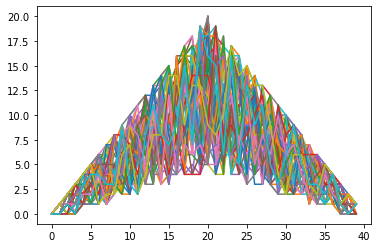

In [8]:
for participant in study_participants:
    plt.plot(participant);  # The semicolon keeps the notebook from printing out extra information

1.  Looks very busy.
2. Looks very triangular!  

Now we could try to re-orient our list of lists to look at things along the other axis.  But we're really talking about 2D data here, so why not use a library meant to work with 2D (or nD) data?

## 2. Analysis using numpy and matplotlib

In [9]:
import numpy as np

In [10]:
study_participants_array = np.array(study_participants)
study_participants_array

array([[0, 1, 0, ..., 0, 2, 1],
       [0, 0, 2, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 2, ..., 0, 1, 1],
       [0, 1, 2, ..., 1, 2, 1],
       [0, 0, 1, ..., 1, 0, 1]])

Numpy arrays have all sorts of nice features.  For example, we can easily find out what the shape of the array is:

In [11]:
study_participants_array.shape

(60, 40)

So we have 60 participants with 40 observations each.  It turns out that reading these files into Numpy is common enough that we don't need those nested *for* loops to do it - someone's already done it for us:

In [12]:
data = np.loadtxt(fname=first_filename, delimiter=',')
data.shape

(60, 40)

#### Slicing
One of the nice features of numpy arrays is that we can easliy select subsets of the data.  A 60 x 40 array of data is too big to look at easliy, which is why we had all those `...` above, so we'll make a smaller one for this.

In [13]:
array = np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12]])
print(array)
print(array.shape)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
(4, 3)


Notice that arrays are oriented rows x columns.  This is the standard way of representing matrices in linear algebra - one of the primary uses of Numpy, but can git a little confusing.  In the same way we could slice lists or tuples, we can slice nD arrays.  The only difference here is that we can work directly in nD.  

It's worth noting here that you must specify the rows to take.  If you leave out the columns, numpy assumes you want all of them.

In [14]:
# Both of these slices do the same thing
print(array[0:2])
print()
print(array[0:2, :])

[[1 2 3]
 [4 5 6]]

[[1 2 3]
 [4 5 6]]


In [15]:
# If you want all the rows, but a subset of columns, you have to be specific:
print(array[:, 0:2])

[[ 1  2]
 [ 4  5]
 [ 7  8]
 [10 11]]


#### Plotting  
Because numpy is designed to work with arrays of values, we can easily remake the plot above, without the loop.  

As you can see, the default orientation plots one line per observation - meaning we see 40 lines (one for each observation,) each with 60 data points on the x-axis for the 60 participants.

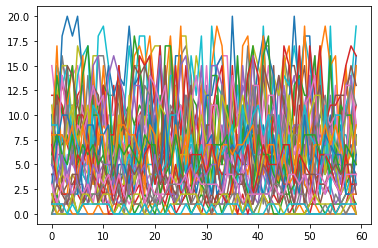

In [16]:
plt.plot(data);

What a mess.  What we wanted was a plot across the observations, not participants.  Fortunatelly, we can just swap the axes of the array using a 'Transpose'.  In the same way nD arrays carry around their shape in the `.shape` attribute, they carry around their transpose in the `.T` attribute.

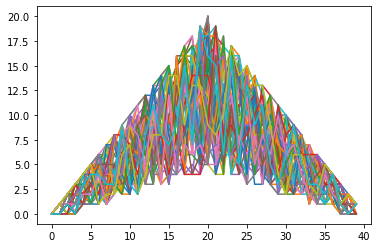

In [17]:
plt.plot(data.T);

### EXERCISE 1 - Min, mean, max

1. Extract the data for the second patient
2. Calculate the minimum, mean, and maximum inflamation scores for that patient
3. Using the `axis=` parameter, calculate the minimum, mean, and maximum inflamation scores for each observation  
    *tip: since there are 60 patients with 40 observations each, you can check that you're working observation-wise and not patient wise* 
4. Plot the minimum, average, and maximum inflamation scores per observation

__BONUS__

Ask google how to add a figure legend to your plot.
1. Search google for "add figure legend to matplotlib"
2. Choose the first link to `stackoverflow.com`
3. Look at the top answer, which generally should have a green check mark 

Second patient min: 0.0 avg: 6.35 max: 17.0


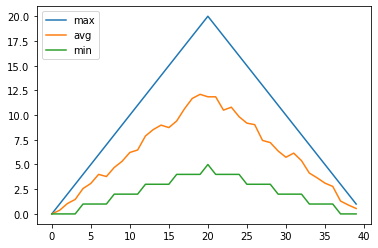

In [18]:
second_patient = data[1]
assert(len(second_patient) == 40)
print('Second patient min:', second_patient.min(), 'avg:', second_patient.mean(), 'max:', second_patient.max())

data_min = data.min(axis=0)
assert len(data_min) == 40
data_mean = data.mean(axis=0)
data_max = data.max(axis=0)

plt.plot(data_max, label='max')
plt.plot(data_mean, label='avg')
plt.plot(data_min, label='min')

plt.legend(loc='upper left');

Ok, so it's time to call the IRB and report someone for faking (badly) the data.  

### EXERCISE 2 - multiple files
Re-create the plot above for the first three `.csv` files.  In order to get a new figure, use: `plt.figure()`

__BONUS__

Ask google how to add a figure title to each plot, so that you can tell which file it comes from.

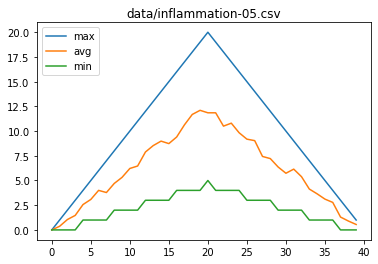

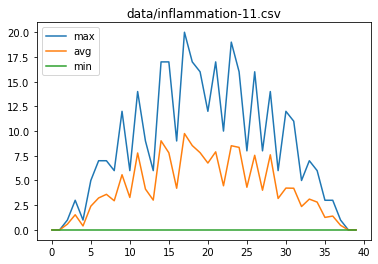

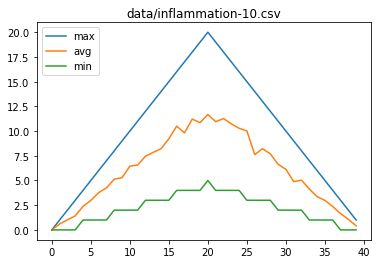

In [19]:
for f in data_filenames[:3]:
    data = np.loadtxt(fname=f, delimiter=',')
    plt.figure()
    plt.plot(data.max(axis=0), label='max')
    plt.plot(data.mean(axis=0), label='avg')
    plt.plot(data.min(axis=0), label='min')
    plt.title(f)
    plt.legend(loc='upper left')

Ok, so it's time to call the IRB and report everyone for faking (badly) the data.  

## 3. Analysis using pandas and matplotlib

Numpy is designed and built for doing array manipulations.  It's good at doing the kinds of table-like operations we've been doing so far, but it's really meant for doing math.  The Pandas library, on the other hand, is built from the ground up for doing this type of work.  

The most common feature of Pandas you're likely to use is called a DataFrame (if you're familiar with the R programming languate, these are the same as data frames in that language.)  These are 2D tables of data, that can behave like both Excel spreadsheets and database tables.  More on Excel later,...

Like Numpy and Matplotlib, Pandas is a large, powerful library, and we're only going to look at a small portion in this workshop.

In [20]:
import pandas as pd

In [21]:
pd.read_csv(DATA_LOCATION + 'inflammation-01.csv')

,0,0.1,1,3,1.1,2,4,7,8,3.1,...,4.3,4.4,5.1,7.6,3.4,4.5,2.1,3.5,0.2,0.3
0,0,1,2,1,2,1,3,2,2,6,...,3,5,4,4,5,5,1,1,0,1
1,0,1,1,3,3,2,6,2,5,9,...,10,5,4,2,2,3,2,2,1,1
2,0,0,2,0,4,2,2,1,6,7,...,3,5,6,3,3,4,2,3,2,1
3,0,1,1,3,3,1,3,5,2,4,...,9,6,3,2,2,4,2,0,1,1
4,0,0,1,2,2,4,2,1,6,4,...,8,4,7,3,5,4,4,3,2,1
5,0,0,2,2,4,2,2,5,5,8,...,8,8,4,2,3,5,4,1,1,1
6,0,0,1,2,3,1,2,3,5,3,...,4,9,3,5,2,5,3,2,2,1
7,0,0,0,3,1,5,6,5,5,8,...,4,6,4,7,6,3,2,1,0,0
8,0,1,1,2,1,3,5,3,5,8,...,2,5,4,5,1,4,1,2,0,0
9,0,1,0,0,4,3,3,5,5,4,...,4,3,4,5,5,3,3,2,2,1


Oops!  By default, Pandas assumes that the first row is the column names.  As our data has no header, we need to tell Pandas that the header is `None`.

In [22]:
pd.read_csv(DATA_LOCATION + 'inflammation-01.csv', header=None)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0,0,1,3,1,2,4,7,8,3,...,4,4,5,7,3,4,2,3,0,0
1,0,1,2,1,2,1,3,2,2,6,...,3,5,4,4,5,5,1,1,0,1
2,0,1,1,3,3,2,6,2,5,9,...,10,5,4,2,2,3,2,2,1,1
3,0,0,2,0,4,2,2,1,6,7,...,3,5,6,3,3,4,2,3,2,1
4,0,1,1,3,3,1,3,5,2,4,...,9,6,3,2,2,4,2,0,1,1
5,0,0,1,2,2,4,2,1,6,4,...,8,4,7,3,5,4,4,3,2,1
6,0,0,2,2,4,2,2,5,5,8,...,8,8,4,2,3,5,4,1,1,1
7,0,0,1,2,3,1,2,3,5,3,...,4,9,3,5,2,5,3,2,2,1
8,0,0,0,3,1,5,6,5,5,8,...,4,6,4,7,6,3,2,1,0,0
9,0,1,1,2,1,3,5,3,5,8,...,2,5,4,5,1,4,1,2,0,0


While Numpy arrays are designed to do math, Pandas dataframes are designed to hold data, so in general you should try to treat them as immutable.  They also tend to be column focused, so while you think you may be doing a Numpy type slice, Pandas may think you're asking for either a column or some rows:

In [23]:
inflammation_01 = pd.read_csv(DATA_LOCATION + 'inflammation-01.csv', header=None)
inflammation_01[0]  # Column 0

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
Name: 0, dtype: int64

In [24]:
inflammation_01[0:3]  # but this is the first three rows.

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0,0,1,3,1,2,4,7,8,3,...,4,4,5,7,3,4,2,3,0,0
1,0,1,2,1,2,1,3,2,2,6,...,3,5,4,4,5,5,1,1,0,1
2,0,1,1,3,3,2,6,2,5,9,...,10,5,4,2,2,3,2,2,1,1


__Ouch!__  

To simplify matters, Pandas provides a location indexer that behaves exactly like Numpy

In [25]:
inflammation_01.loc[1]

0      0
1      1
2      2
3      1
4      2
5      1
6      3
7      2
8      2
9      6
10    10
11    11
12     5
13     9
14     4
15     4
16     7
17    16
18     8
19     6
20    18
21     4
22    12
23     5
24    12
25     7
26    11
27     5
28    11
29     3
30     3
31     5
32     4
33     4
34     5
35     5
36     1
37     1
38     0
39     1
Name: 1, dtype: int64

You may have noticed that the slice we've just taken brings it's own index with it (the numbers 0 through 39).  Remember that Pandas behaves as a spreadsheet.  While using `.loc[]` looks like it uses 'positional' slicing, what you're actually doing is slicing based on the index.  

If we create a dataframe with labeled rows and columns, the behaviour becomes more clear

In [26]:
df = pd.DataFrame([[1,2,3], [4,5,6], [7,8,9]], index=['one', 'two', 'three'], columns = ['a', 'b', 'c'])
df

,a,b,c
one,1,2,3
two,4,5,6
three,7,8,9


In [27]:
df[['a','b']]  # We can ask for a list of columns

,a,b
one,1,2
two,4,5
three,7,8


Or we can use the `.loc[]` indexing to do the same kind of slice we do with Numpy:

In [28]:
df.loc['one':'two']

,a,b,c
one,1,2,3
two,4,5,6


But we can also provide a list of indices, and Pandas will give us those back in the order we ask for them.

In [29]:
df.loc[['three','one'], ['c', 'a', 'b']]

,c,a,b
three,9,7,8
one,3,1,2


So what do we get for this increased complexity?

### EXERCISE 3 - General information on our csv file with Pandas
1. Load the second csv file into a Pandas DataFrame called inflammation_02
2. Create a variable called inflammation_02_description using the .describe() method of the DataFrame
3. Examine the contents of the inflammation_02_description variable  

4. Using the `.loc[]` indexer, extract the max, min, and average values and conver them to lists
5. Plot the max, min, and average values using plt.plot()

In [30]:
inflammation_02 = pd.read_csv(DATA_LOCATION + 'inflammation-02.csv',header=None)
inflammation_02_description = inflammation_02.describe()
inflammation_02_description

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,60.0,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.0,0.500000,0.933333,1.583333,2.633333,2.666667,3.583333,4.133333,4.783333,5.633333,...,6.133333,5.550000,4.966667,3.666667,3.833333,2.983333,2.466667,1.500000,1.133333,0.533333
std,0.0,0.504219,0.820638,1.046247,1.119423,1.410213,1.629096,2.020796,1.975199,2.328647,...,2.480204,2.302725,2.098964,2.055721,1.757952,1.371522,1.185601,1.142403,0.812334,0.503098
min,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,1.000000,2.000000,1.000000,2.000000,2.750000,3.000000,4.000000,...,4.000000,4.000000,3.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,0.0,0.500000,1.000000,2.000000,2.500000,2.000000,4.000000,4.000000,4.500000,6.000000,...,6.000000,5.500000,4.500000,3.000000,4.000000,3.000000,2.000000,2.000000,1.000000,1.000000
75%,0.0,1.000000,2.000000,2.000000,4.000000,4.000000,5.000000,6.000000,6.250000,8.000000,...,8.000000,7.000000,7.000000,5.250000,5.000000,4.000000,4.000000,2.250000,2.000000,1.000000
max,0.0,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,10.000000,9.000000,8.000000,7.000000,6.000000,5.000000,4.000000,3.000000,2.000000,1.000000


In [31]:
print('max:')
print(list(inflammation_02_description.loc['max']))
print()
print('min:')
print(list(inflammation_02_description.loc['min']))
print()
print('average:')
print(list(inflammation_02_description.loc['mean']))

max:
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]

min:
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0]

average:
[0.0, 0.5, 0.9333333333333333, 1.5833333333333333, 2.6333333333333333, 2.6666666666666665, 3.5833333333333335, 4.133333333333334, 4.783333333333333, 5.633333333333334, 6.216666666666667, 6.5, 7.3, 7.566666666666666, 8.083333333333334, 9.3, 9.433333333333334, 10.05, 10.45, 11.516666666666667, 12.716666666666667, 11.116666666666667, 10.8, 10.0, 10.233333333333333, 8.866666666666667, 8.033333333333333, 8.2, 7.6, 6.433333333333334, 6.133333333333334, 5.55, 4.966666666666667, 3.6666666666666665, 3.8333333333333335, 2.9833333333333334, 2.466666666666667, 1

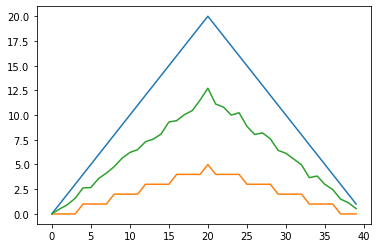

In [32]:
plt.plot(inflammation_02_description.loc['max'])
plt.plot(inflammation_02_description.loc['min'])
plt.plot(inflammation_02_description.loc['mean'])

Because Pandas dataframes behave like Excel spreadsheets, the people who created pandas decided that you should be able to work with Excel spreadsheets.  

Load a all the sheets from the `inflamation.xlsx` Excel file by telling the `read_excel` function not to take a specific one (note that by default it takes the first one).  This will give us a Dictionary of sheets:

In [33]:
inflammation_workbook = pd.read_excel(DATA_LOCATION + 'inflammation.xlsx', sheet_name=None, header=None)
inflammation_workbook.keys()

dict_keys(['inflammation-01', 'inflammation-02', 'inflammation-03', 'inflammation-04', 'inflammation-05', 'inflammation-06', 'inflammation-07', 'inflammation-08', 'inflammation-09', 'inflammation-10', 'inflammation-11', 'inflammation-12', 'inflammation-13'])

In [34]:
inflammation_workbook['inflammation-01']

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0,0,1,3,1,2,4,7,8,3,...,4,4,5,7,3,4,2,3,0,0
1,0,1,2,1,2,1,3,2,2,6,...,3,5,4,4,5,5,1,1,0,1
2,0,1,1,3,3,2,6,2,5,9,...,10,5,4,2,2,3,2,2,1,1
3,0,0,2,0,4,2,2,1,6,7,...,3,5,6,3,3,4,2,3,2,1
4,0,1,1,3,3,1,3,5,2,4,...,9,6,3,2,2,4,2,0,1,1
5,0,0,1,2,2,4,2,1,6,4,...,8,4,7,3,5,4,4,3,2,1
6,0,0,2,2,4,2,2,5,5,8,...,8,8,4,2,3,5,4,1,1,1
7,0,0,1,2,3,1,2,3,5,3,...,4,9,3,5,2,5,3,2,2,1
8,0,0,0,3,1,5,6,5,5,8,...,4,6,4,7,6,3,2,1,0,0
9,0,1,1,2,1,3,5,3,5,8,...,2,5,4,5,1,4,1,2,0,0


One final bit of Pandas.  It plots, too.

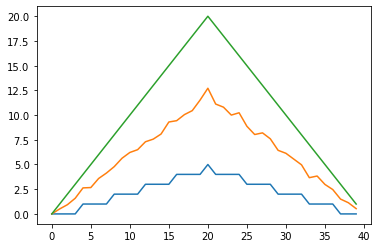

In [35]:
inflammation_02_description.loc['min'].plot()
inflammation_02_description.loc['mean'].plot()
inflammation_02_description.loc['max'].plot()

### EXERCISE 3 - Plot all the things!

Plot min, average, and max values for all the sheets in your excel file.  

__bonus__:  
Plot them in order.  
*tip: you can order the keys in a dictionary using `sorted(dictionary.keys())`*

/Users/tjr22/bin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/tjr22/bin/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/tjr22/bin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitl

<Figure size 432x288 with 0 Axes>

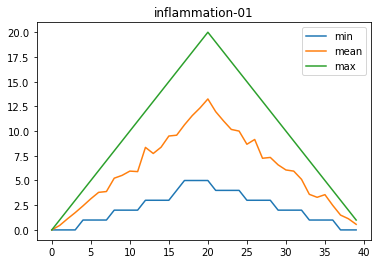

<Figure size 432x288 with 0 Axes>

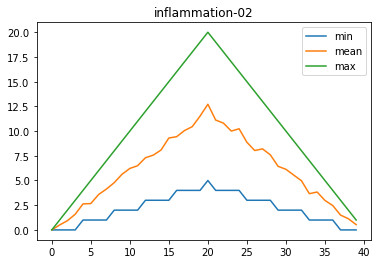

<Figure size 432x288 with 0 Axes>

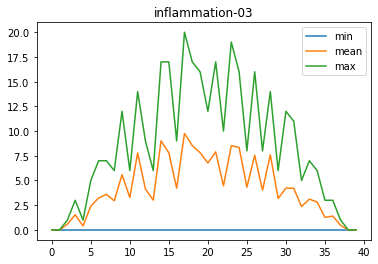

<Figure size 432x288 with 0 Axes>

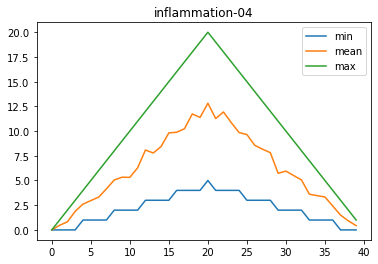

<Figure size 432x288 with 0 Axes>

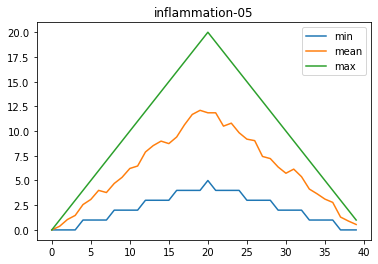

<Figure size 432x288 with 0 Axes>

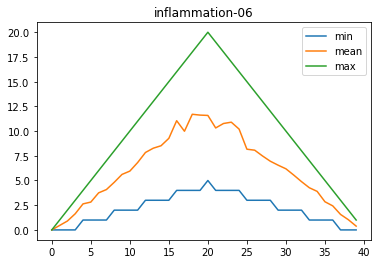

<Figure size 432x288 with 0 Axes>

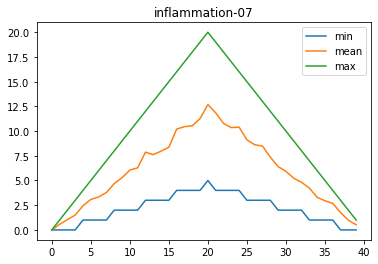

<Figure size 432x288 with 0 Axes>

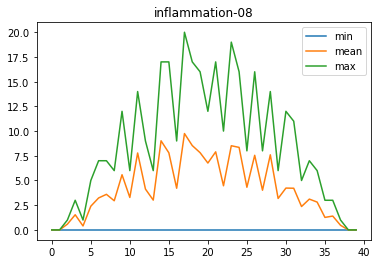

<Figure size 432x288 with 0 Axes>

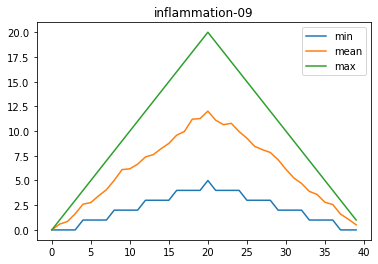

<Figure size 432x288 with 0 Axes>

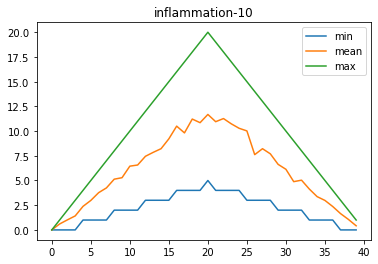

<Figure size 432x288 with 0 Axes>

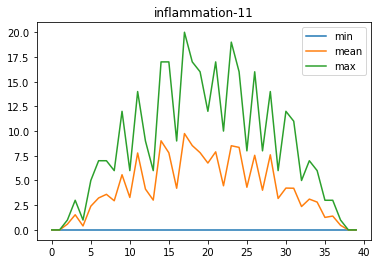

<Figure size 432x288 with 0 Axes>

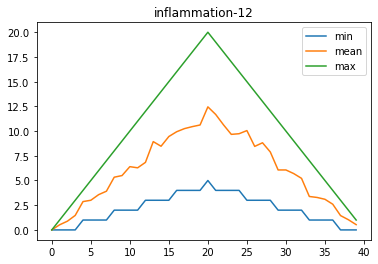

<Figure size 432x288 with 0 Axes>

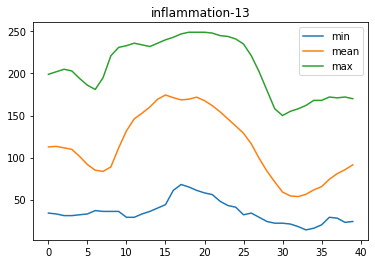

In [36]:
for name in sorted(inflammation_workbook.keys()):
    plt.figure()
    sheet_description = inflammation_workbook[name].describe()
    sheet_description.loc[['min', 'mean', 'max']].T.plot()
    plt.title(name)

Hmm,...  That last one looks funny.

## One final plot...  
As our data is 2-dimensional, one final way we can plot it is to show it as an image.  Because Pandas and Matplotlib work together well, it's easy.  We just use the `imshow` method of the `pyplot` library, and then add a colorbar to get a range.

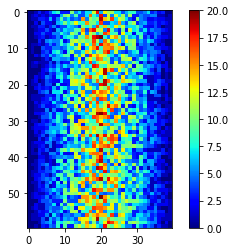

In [37]:
plt.imshow(inflammation_workbook['inflammation-01'], cmap='jet')
plt.colorbar()

MathWorks, the company who makes Matlab, used to use the Jet colormap (and so did Matplotlib before version 2.0.)  This colormap was so popular (and pretty,) it became the default in most packages.  Unfortunatelly, Jet is a terrible colormap. Reciently, there has been a lot of research about the effects of different colormaps on our perception of data that has shown how truly awful the Jet colormap is.  In [one recient study](http://www.eecs.harvard.edu/~kgajos/papers/2011/borkin11-infoviz.pdf), physicians who were switched from Jet to a perceptually 'appropriate' map showed a 47% increase in the ability to detect potential sites of coronary artery disease.

Because Jet was so bad, Mathworks changed their default map to one called *parula*, which is much better, but still not ideal.  Matplotlib has gone for a map called *viridis* which is perceptually uniform, looks the same if you have red-green colour blindness, and prints nicely in black and white.

As an example, we'll plot the same data as above using both a greyscale map and viridis.

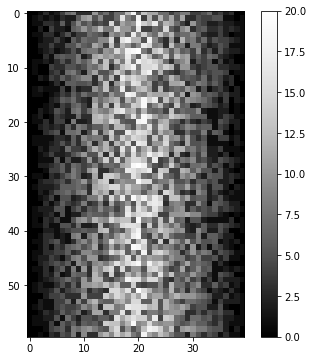

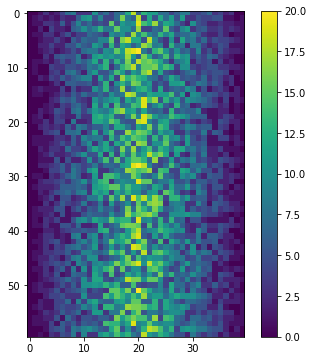

In [38]:
plt.figure(figsize=(6,6))  # Notice that you can change the figure size by poviding an (x,y) tuple

plt.imshow(inflammation_workbook['inflammation-01'], cmap='Greys_r')
plt.colorbar()

plt.figure(figsize=(6,6))

plt.imshow(inflammation_workbook['inflammation-01'], cmap='viridis')
plt.colorbar()

### EXERCISE 4 - Try some other colormaps

Repeat the plot above using *at least* three different maps.

__tip: Google 'matplotlib colormap'__


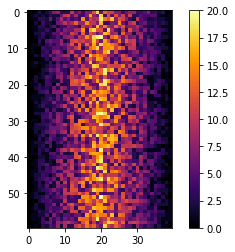

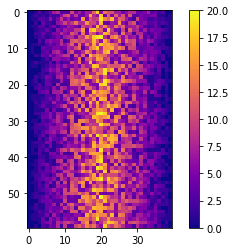

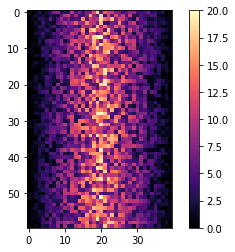

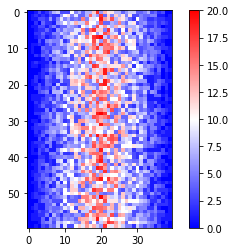

In [39]:
plt.imshow(inflammation_workbook['inflammation-01'], cmap='inferno')
plt.colorbar()

plt.figure()

plt.imshow(inflammation_workbook['inflammation-01'], cmap='plasma')
plt.colorbar()

plt.figure()

plt.imshow(inflammation_workbook['inflammation-01'], cmap='magma')
plt.colorbar()

plt.figure()

plt.imshow(inflammation_workbook['inflammation-01'], cmap='bwr')
plt.colorbar()

### EXERCISE 5 - I promise Jet is bad

Plot all the spreadsheets in the viridis, Greys_r, and jet colormaps.

Do you see anything interesting???

/Users/tjr22/bin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


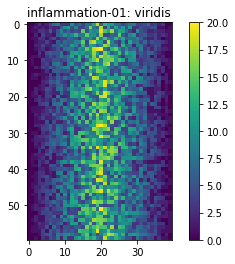

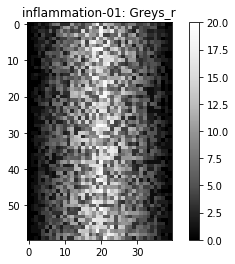

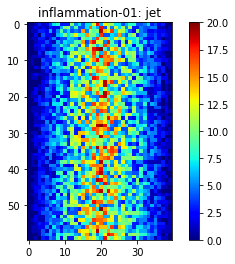

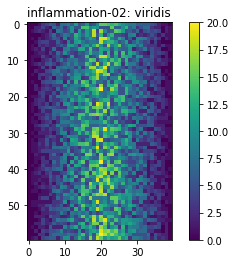

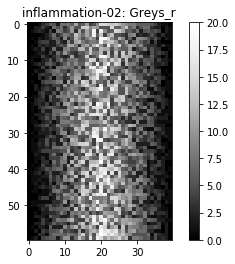

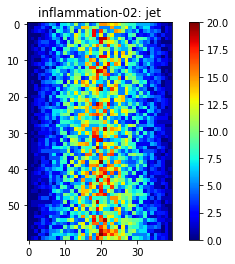

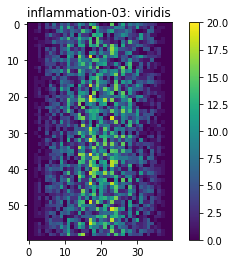

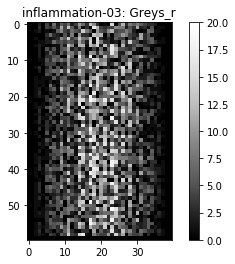

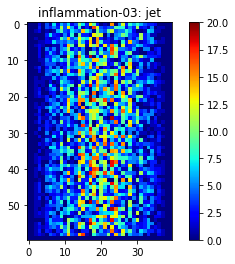

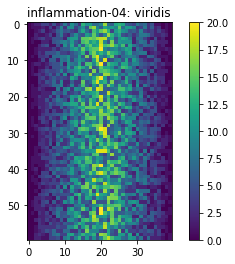

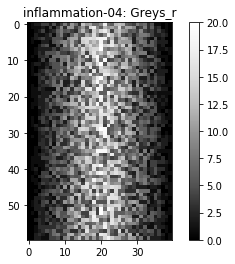

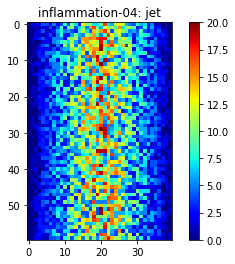

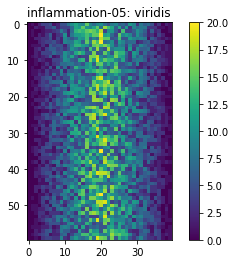

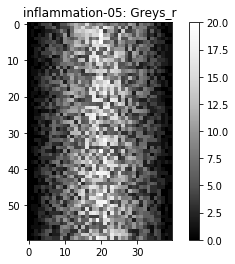

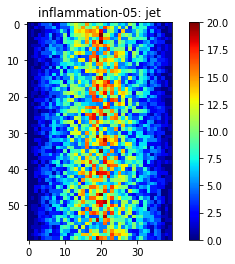

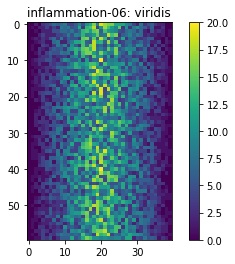

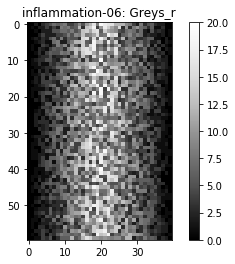

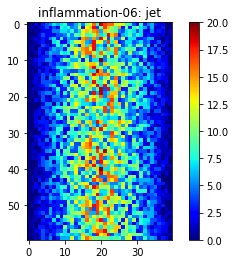

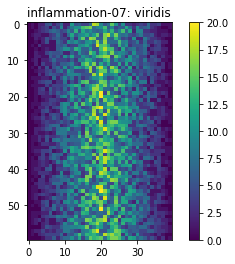

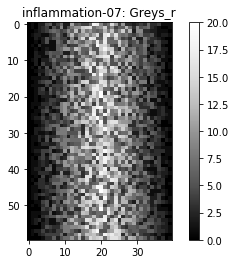

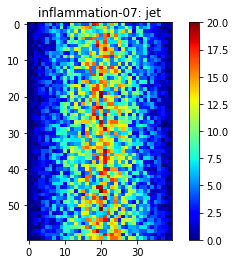

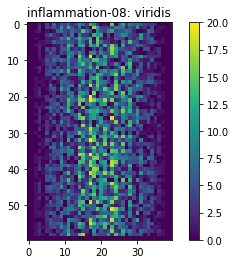

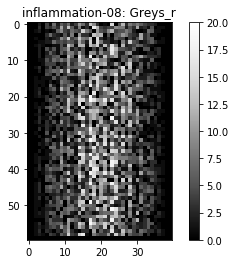

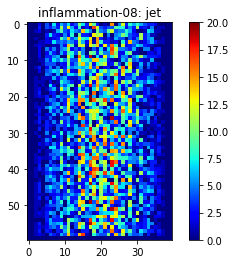

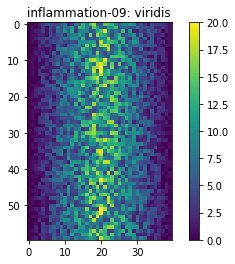

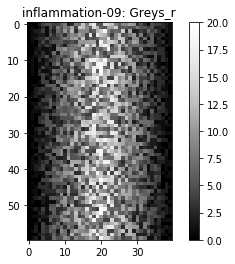

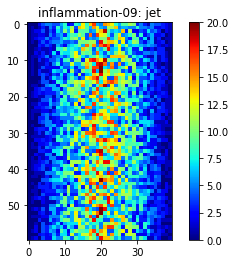

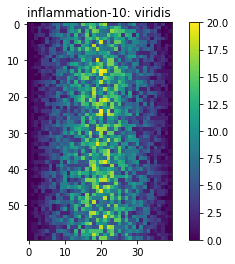

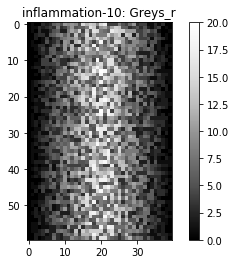

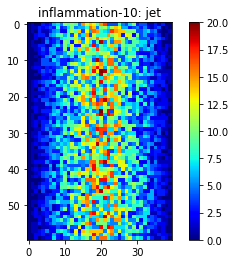

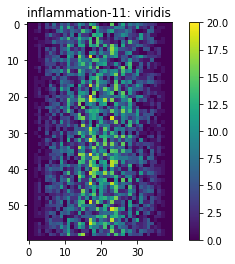

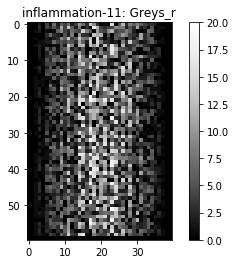

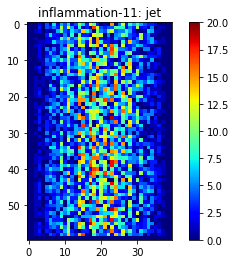

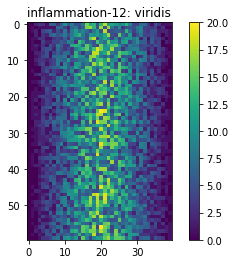

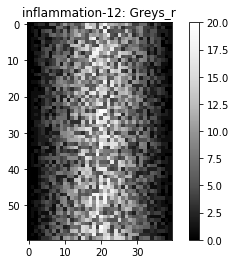

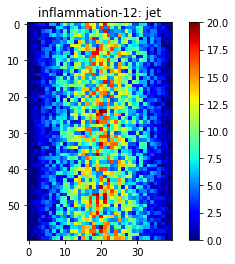

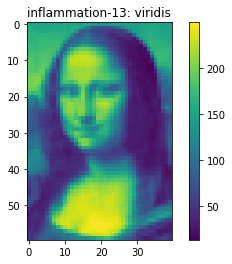

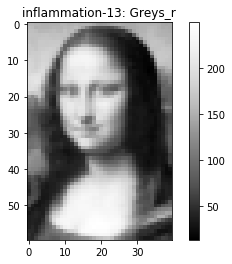

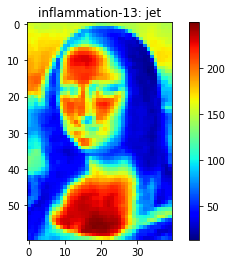

In [40]:
for name in sorted(inflammation_workbook.keys()):
    for cm in ['viridis', 'Greys_r', 'jet']:
        plt.figure()
        plt.imshow(inflammation_workbook[name], cmap=cm)
        plt.colorbar()
        plt.title(name + ': ' + cm)